In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import numpy as np
import geopandas as gpd
import os

In [2]:
# Diretório dos arquivos netCDF
netCDF_file = r"C:\IC\netCDF\MERGE_CPTEC_20160116.nc"

# Colocando arquivos netCDF em uma lista
# netCDF_files = [os.path.join(netCDF_dir, f) for f in os.listdir(netCDF_dir) if f.endswith('.nc')]

# diretorio com os plots
diretorio = "D:\WRF_dados\plots"


In [3]:
# abrindo arquivos netCDF
ds = xr.open_dataset(r'C:\IC\netCDF\MERGE_CPTEC_20160116.nc')
ds['prec'].values

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\IC\\netCDF\\MERGE_CPTEC_20160116.nc'

In [6]:
netcdf = xr.open_dataset(netCDF_file)

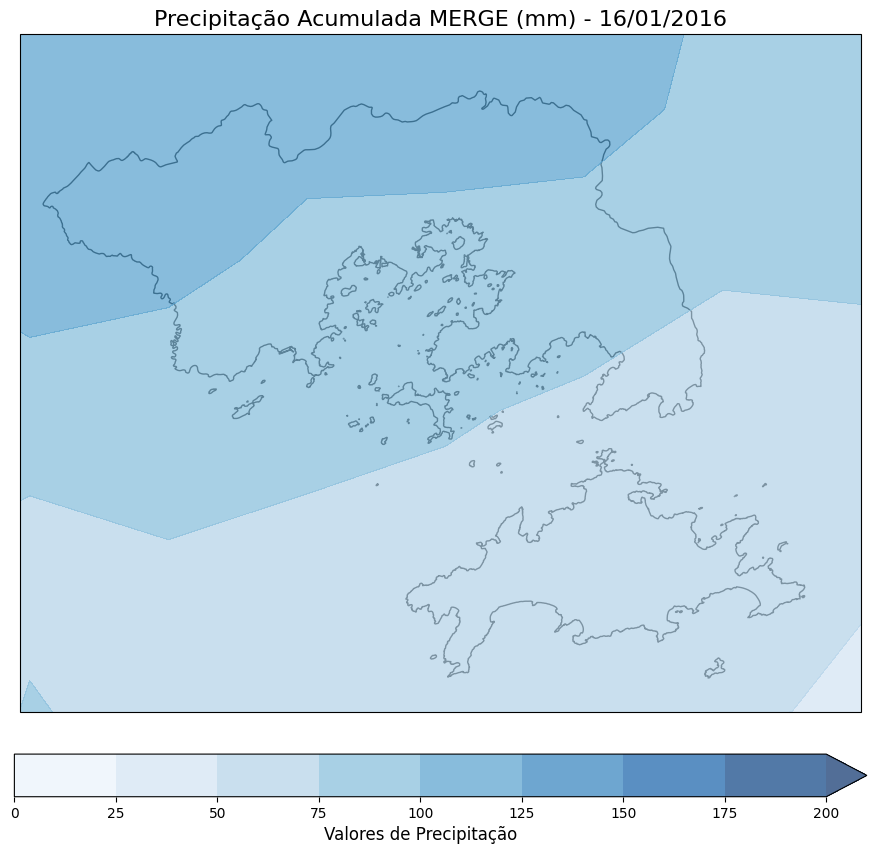

In [22]:
fig, ax = plt.subplots(figsize = (11,11), subplot_kw = {'projection': ccrs.PlateCarree()})

shape_file = r'C:\IC\Mapa\Estados_utm23s.shp'
angra = gpd.read_file(shape_file) #Transforme esse comentario em codigo
angra.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)

# titulo do mapa
ax.set_title('Precipitação Acumulada MERGE (mm) - 16/01/2016', fontsize=16)

# Recorte do Mapa
localizacao_angra = ([-44.657, -44.05, -23.25, -22.8])
ax.set_extent(localizacao_angra)
# ax.coastlines()

# corrigindo a longitude
netcdf['longitude'] = (netcdf['longitude'] + 180) % 360 - 180

# Mapa de contorno
lon,lat = np.meshgrid(netcdf.longitude.values, netcdf.latitude.values)

# Definir os limites da escala de cores de até 200 - 0 a 25, 25 a 50, 50 a 75, 75 a 100, 125 a 150, 1750 a 175, 175 a 200
levels = [0, 25, 50, 75, 100, 125, 150, 175, 200]  # 8 níveis para cobrir até 200
mapa_de_contorno = ax.contourf(lon,lat, netcdf['prec'].values, alpha=0.7, cmap='Blues', levels=levels, extend='max')

# barra de cores
cbar = plt.colorbar(mapa_de_contorno, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label('Valores de Precipitação', fontsize=12)

# salvando a figura no diretório
plt.savefig(os.path.join(diretorio, 'chuva_acumlada_merge_'+os.path.basename(netCDF_file).replace('.nc', '.png')), dpi=300, bbox_inches='tight')

# plt.savefig(r'C:\IC\Plots', dpi=300, bbox_inches='tight', transparent=True)
# plt.savefig(os.path.join(netCDF_file, 'chuva_acumulada_'+os.path.basename(arquivo).replace('.nc', '.png')))
